## **AI Project**
## **Title** : Classification of Mushrooms (Edible/Poisonous)
## **Aim** : This project aims to predict which features are most indicative of a poisonous mushroom.

## **Team Name** : Curious 4 AI

### **Team** : Sarvani Konda, Venkata Prasanth Pinaka, Srikar Singam and Jayadev Varma Sri Kakarlapudi

In [ ]:
# import required packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objs as gob
import plotly.offline as ply
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score,cross_validate,RandomizedSearchCV, train_test_split
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset and check the data type and number of samples
mushrooms = pd.read_csv("/content/agaricus-lepiota.data",header=None)
mushrooms.columns = ['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

print("The dataframe shape: ",mushrooms.shape)
print("*"*30)
print("Printing first five entries in the Dataframe:")
print(mushrooms.head())

The dataframe shape:  (8124, 23)
******************************
Printing first five entries in the Dataframe:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below

In [ ]:
# check the data types of the dataset
print(mushrooms.dtypes)
mushrooms.describe().T

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
# Checking for null values in the dataset
mushrooms.isnull().sum().sort_values(ascending=False)

class                       0
stalk-surface-above-ring    0
population                  0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-root                  0
cap-shape                   0
stalk-shape                 0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
habitat                     0
dtype: int64

### **Observation** :

 From the above output, it can be seen that there are zero null values in the dataset.

In [ ]:
# Value count of class attribute(target).

mushrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
# Creating pie chart for Target class
x = mushrooms.drop(columns='class')
y = mushrooms['class']

# Renaming classes
y=y.replace('p','poisonous')
y=y.replace('e','edible')
pie_values = pd.Series(y).value_counts()
trace = gob.Pie(labels=['edible','poisonous'],values=pie_values)
ply.iplot([trace])

In [ ]:

# Extract the duplicate rows from the original dataframe
print("Duplicate entries: ",mushrooms[mushrooms.duplicated()])
print("\n"+"*"*40+"\n")

# Drop duplicates from the dataset is not needed as from above statement ouput we 
# can see that there are zero duplicates.

# Identify missing values in each feature column
for i in mushrooms.columns:
    print(i,mushrooms[i].unique())
 

Duplicate entries:  Empty DataFrame
Columns: [class, cap-shape, cap-surface, cap-color, bruises, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, veil-type, veil-color, ring-number, ring-type, spore-print-color, population, habitat]
Index: []

[0 rows x 23 columns]

****************************************

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 

### **Observation** :
From the above output it can be observed that 'stalk-root' contains '?' value which is missing data. We need to fill it with reasonable value instead of '?'.

In [ ]:
mushrooms['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [ ]:
# Imputation Strategy
# Filling '?' in stalk-root attribute with 'b' which has the most frequency.
mushrooms['stalk-root'] = mushrooms['stalk-root'].replace('?','b')
mushrooms['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

## Data Transformation

In [ ]:
# Converting each value in a column from a string value to a number using LabelEncoder.
le = LabelEncoder()
for i in mushrooms.columns[:]:
    mushrooms[i] = le.fit_transform(mushrooms[i])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Univariate Analysis


In [ ]:
# Descriptive Analysis
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45870e5690>,
      dtype=object)

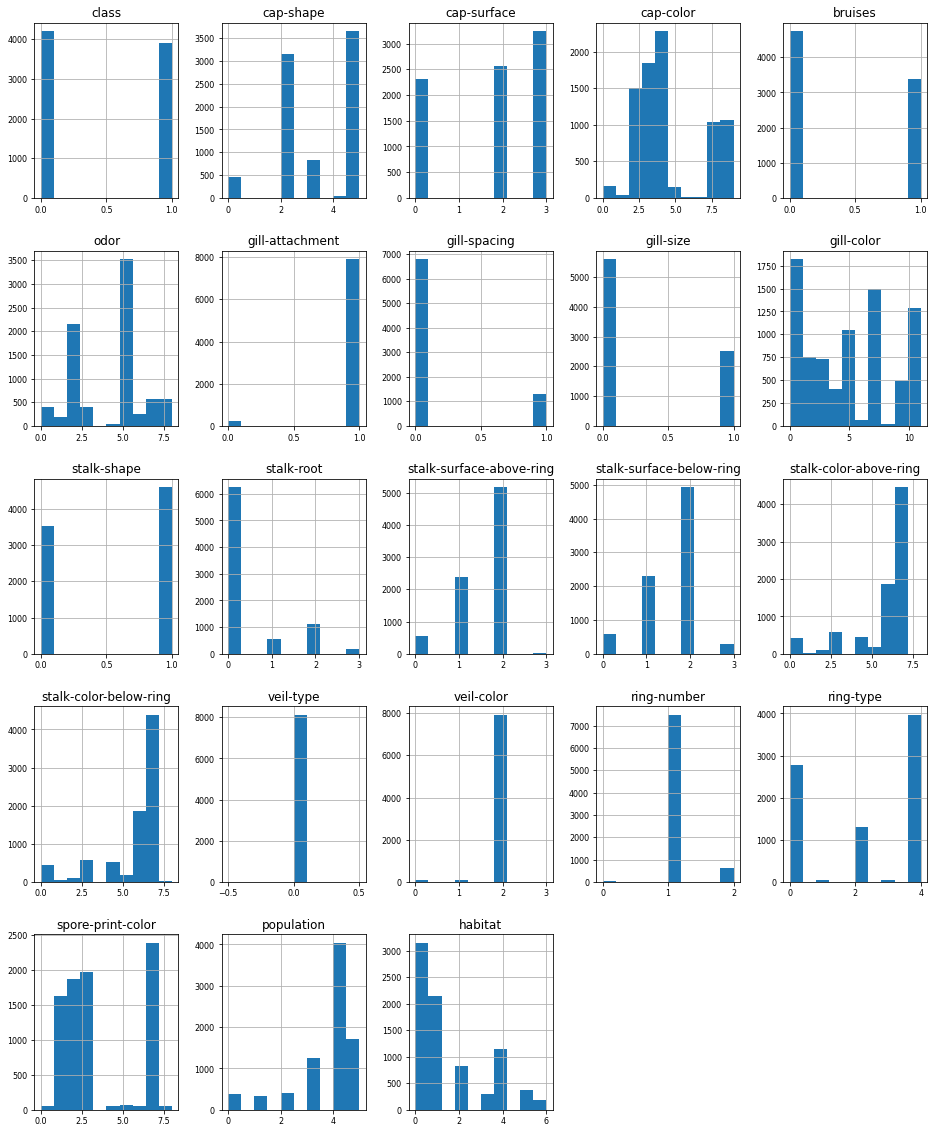

In [ ]:
mushrooms.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f45866b6890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f45866bd650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f45866b6bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f45872ea410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f45872ea050>],
 'means': []}

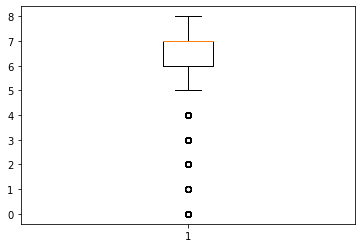

In [ ]:
# Boxplot between class and stalk-color-above-ring as "stalk-color-above-ring" has the highest mean of 5.816
plt.boxplot(mushrooms['stalk-color-above-ring'])



## **Observation** :
It is observed from the above histograms and boxplot that the data we are using is a skewed data as we can observe a degree of asymmetry in distribution, In the above single histograms for each column gill-color and cap-color attributes' histograms have a little normalized distributions where as every other attribute has skewed data.

# Bivariate Analysis

In [ ]:
mushrooms.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


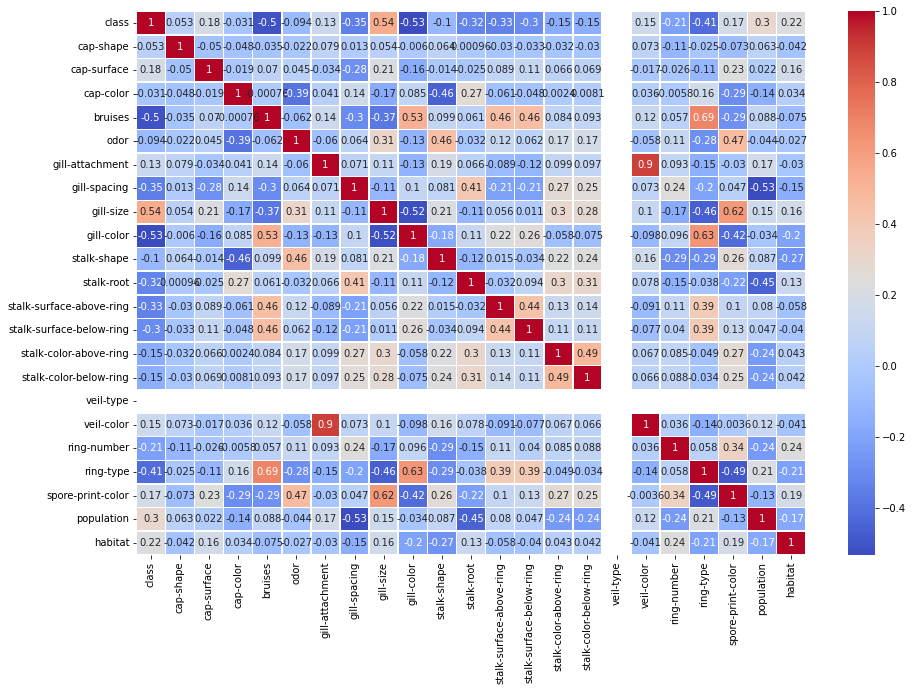

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(mushrooms.corr(),annot=True,cmap='coolwarm',linewidths=.5)

In [ ]:
# Removing veil-type feature from the dataset as it is a constant value(0) and not contributing anything.
mushrooms = mushrooms.drop(["veil-type"],axis=1)

## **Observation**:
From the above heatmap plot, correlation of attribute veil-type data of the mushroom's is constant 'Nan'(zero) indicating no relationship, this column is useless in our analysis.

It is explored that Veil-color is highly correlated with the Gill-attachment with correlation value of 0.9.


In [ ]:
#Pairplot
#sns.pairplot(mushrooms)

## **Observations**:
From the plots it is observed that cap-color and gill color are highly non linearly related when compared to other features.


#  Split the data into Train, Test sets

In [ ]:
y = mushrooms.pop('class')
X = mushrooms

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)
print('X_train size:',X_train.shape)
print('X_test size:',X_test.shape)

X_train size: (6499, 21)
X_test size: (1625, 21)


### Observation: 
The entire dataset, after exploration is divided into train and test sets in 80:20.
The train set 80 percent is used as validation and is divided as 576 and 144 samples.

#  Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)

# Train the model


In [ ]:
rf.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

#  Exploration or Prediction

In [ ]:
# Predict y data with classifier: 
#predictions = classifier.predict(X_test)
predictionsRF = rf.predict(X_test)
predictionsKNN= KNN.predict(X_test)
predictionsDT = DT.predict(X_test)

 The accuracy of RF 1.0
RF model details
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

TN = 842, FP = 0, FN = 0, TP= 783


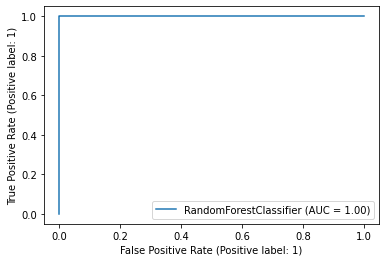

In [ ]:
# Prediction using Random Forest

# print accuracy
scoreRF = accuracy_score(y_test, predictionsRF)
print(f' The accuracy of RF {scoreRF}')
# print confusion matrix including precision, recall, f1-score
print("RF model details")
print(classification_report(y_test, predictionsRF))
tn, fp, fn, tp = confusion_matrix(y_test, predictionsRF).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP= {tp}')
plot_roc_curve(rf, X_test, y_test) 

 The accuracy of KNN 1.0
KNN model details
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

TN = 842, FP = 0, FN = 0, TP= 783


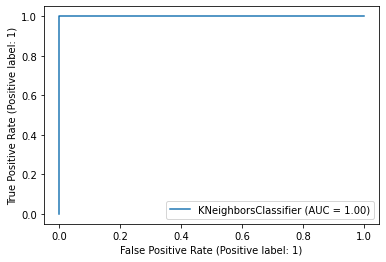

In [ ]:
# Prediction using KNN

# print accuracy
scoreKNN = accuracy_score(y_test, predictionsKNN)
print(f' The accuracy of KNN {scoreKNN}')
# print confusion matrix including precision, recall, f1-score
print("KNN model details")
print(classification_report(y_test, predictionsKNN))
tn, fp, fn, tp = confusion_matrix(y_test, predictionsKNN).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP= {tp}')
plot_roc_curve(KNN, X_test, y_test) 

 The accuracy of DT is 1.0
DT model details
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

TN = 842, FP = 0, FN = 0, TP= 783


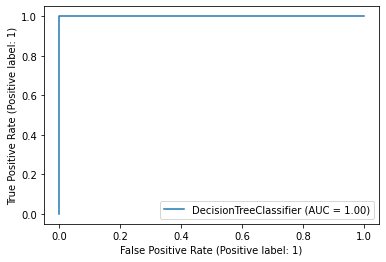

In [ ]:
# Prediction using Decision Tree

# print accuracy
scoreDT = accuracy_score(y_test, predictionsDT)
print(f' The accuracy of DT is {scoreDT}')
# print confusion matrix including precision, recall, f1-score
print("DT model details")
print(classification_report(y_test, predictionsDT))
tn, fp, fn, tp = confusion_matrix(y_test, predictionsDT).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP= {tp}')
plot_roc_curve(DT, X_test, y_test)

### ***Observations:***

From the above confusion matrices of all the three models, it is observed that there are 824 True Positives and 783 True negatives cases are correctly predicted.				
Therefore, the accuracy is 1.00 stating that the model has a correct prediction percent of 100%.					
F1-Score = 2* precision * recall/ precision + recall = 1.00.					

The calculated values and the classification report metrics are thus verified. The ROC for the model is plotted and the obtained AUC value is 1.00 indicating the classifier model is able to distinguish the positive class values from the negative class values correctly.
All the three models Random Forest, K Nearest Neighbors, Decision Tree have the accuracy and f1 score as 1.00 implying that the models have predicted the classification of mushrooms correctly.


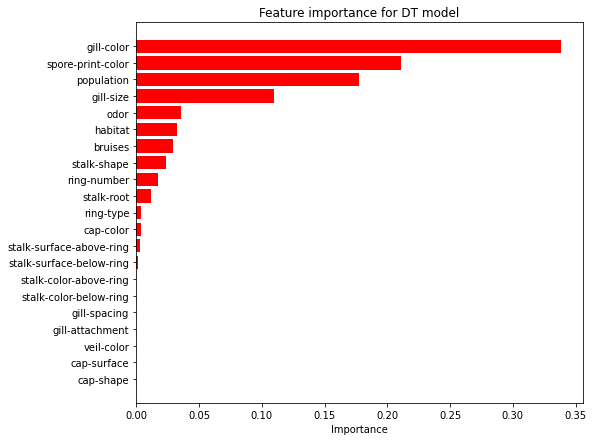

In [ ]:
features_list = X.columns.values
feature_importance = DT.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance for DT model')
plt.draw()
plt.show()

# Optimization & Model Evaluation

Results:
Accuracy mean 98.79%
Accuracy interval 97.41% 100.17%

Paramaters:
criterion: entropy
max_depth: None
min_samples_leaf: 61
min_samples_split: 50


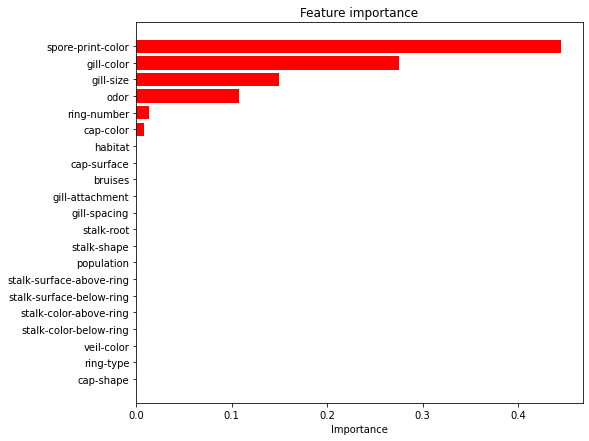

 The accuracy of D_T is 0.9809230769230769
D_T model details
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       842
           1       0.99      0.97      0.98       783

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

TN = 832, FP = 10, FN = 21, TP= 762


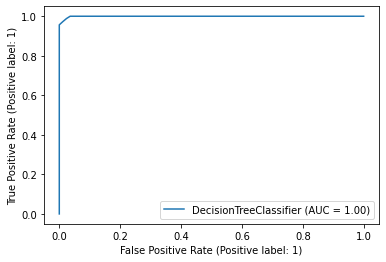

In [ ]:
# DT optimization

paramaters_space = {
    "max_depth": [3,5, 10, 15, 20, 30, None],
    "min_samples_split": randint(32,128),
    "min_samples_leaf": randint(32,128),
    "criterion": ['gini', 'entropy']
}
cv = KFold(n_splits=8, shuffle=True)
search = RandomizedSearchCV(DecisionTreeClassifier(),paramaters_space,cv = cv, n_iter = 11)
search.fit(X, y)
results = cross_validate(search, X, y, cv = cv)
mean = results['test_score'].mean()
std = results['test_score'].std()
print('Results:')
print('Accuracy mean %.2f%%' % (mean * 100))
print('Accuracy interval %.2f%% %.2f%%' % ((mean - 2 * std) * 100, (mean + 2 *std) * 100))
print()
def print_paramaters(par):
    print('Parameters:')
    for key, value in par.items():
        print(f"{key}: {value}")
print_paramaters(search.best_params_)
model = search.best_estimator_
model.fit(X_train, y_train)
predictionsD_T = model.predict(X_test)

# Model Evaluation

features_list = X.columns.values
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

# print accuracy
scoreD_T = accuracy_score(y_test, predictionsD_T)
print(f' The accuracy of D_T is {scoreD_T}')
# print confusion matrix including precision, recall, f1-score
print("D_T model details")
print(classification_report(y_test, predictionsD_T))
tn, fp, fn, tp = confusion_matrix(y_test, predictionsD_T).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP= {tp}')
plot_roc_curve(model, X_test, y_test)

### ***Observations***:
The accuracy of the DT model is obtained as 98.95% using the kd_tree algorithm with the maximum depth of 15. The criterion used is entropy among the selected two. 

Kfold cross validator gives the train/test split dataset. The dataset splitting is done into n_splits = 8 folds.
 
The ROC for the model is plotted and the obtained AUC(1.00) is in the range of 0.5<AUC<=1, indicating the classifier model is able to distinguish the positive class values from the negative class values with great accuracy.

For k=10, iterations=11
Results:
Accuracy mean 98.79%
Accuracy interval 97.41% 100.17%
Parameters:
criterion: entropy
max_depth: None
min_samples_leaf: 61
min_samples_split: 50
